## Portafolio CLG

<a id="indice"></a>
### Indice

Initializing
- [Python Imports](#imports)
- [Definiendo los Target Percentages Portfolio](#target-percentages)
- [Definiendo las Fechas de Analisis](#fechas-analisis)
- [Creando Share Quanity Dataframe](#share-quantity)
- [Creando Cash Quanity Dataframe](#cash-quantity)
- [Creando CETES Directo Dataframe](#cetes-directo)

Imports
- [Importando el Cash History GBM CSV](#cash-history)
- [Importando el Trade History GBM CSV](#trade-history)
- [Importando el Balance de Cetes Directo CSV](#balance-cetes-directo)

Processing
- [Creando y llenando el Share Price Dataframe](#share-price)
    - [Graficando Precios](#graficando-precios)
    - [Limpieza de valores](#limpieza-valores)
- [Pasando el Cash History al Dataframe de Cash Quantity](#cash-history-cash-quantity)
- [Pasando el Trade History al Dataframe de Share Quantity](#trade-history-share-quantity)
- [Pasando el balance de CETES al Dataframe de Share Quantity](#balance-cetes-share-quantity)
- [Juntando los DataFrames de Precios y Cantidades](#juntando-precio-cantidad)
- [Interpolando los Valores faltantes](#interpolando)
- [Añadiendo las columnas de Calculos del Portafolio](#anadiendo-calculos)
- [Graficando el portafolio Total](#portfolio-plot)

Output
- [Guardando el output como CSV](#output-csv)
- [Exportando el dataframe a InfluxDb](#influx)
-------------

## Initializing [*](#indice)

<a id="imports"></a>
### Python Imports [*](#indice)

In [1]:
# Python Imports

# Analisis de datos
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
from influxdb import DataFrameClient

#Importar informacion de Yahoo Finance
import yfinance as yf

# Graficas y Debug de Precios
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id="target-percentages"></a>
### Definiendo los Target Percentages Portfolio [*](#indice)

In [2]:
# Definiendo los Target Percentages Portfolio
target_equity       = 0.30
target_fixed_income = 0.35
target_alternatives = 0.35


<a id="fechas-analisis"></a>
### Definiendo las Fechas de Analisis [*](#indice)

In [3]:
# Definiendo las Fechas de Analisis
start_date = "2019-12-13"
end_date = dt.date.today()


<a id="share-quantity"></a>
### Creando Share Quantity Dataframe [*](#indice)

In [4]:
# Creando Share Quantity Dataframe 

# Defining the column names 
column_names =  ['Date',
                 "Q_VOO",
                 "Q_VGK",
                 "Q_VPL",
                 "Q_IEMG",
                 "Q_MCHI",
                 "Q_FIBRAPL",
                 "Q_GOLD",
                 "Q_CETETRC", 
                 "Q_IB1MXX",
                 "Q_SHV"]

# Create an empty dataframe with column names
quantity_df  = pd.DataFrame(columns = column_names)

# Convert the column Date, now in string type to a datetime type
datetime_series = pd.to_datetime(quantity_df['Date'])

# Make the Date Column the Index
datetime_index = pd.DatetimeIndex(datetime_series.values)

# Creating a new dataframe with the new index and adding the Date column name
quantity_df = quantity_df.set_index(datetime_index).rename_axis('Date', axis=1)

# Dropping the extra Date Column
quantity_df.drop('Date',axis=1,inplace=True)

# show the dataframe
quantity_df


Date,Q_VOO,Q_VGK,Q_VPL,Q_IEMG,Q_MCHI,Q_FIBRAPL,Q_GOLD,Q_CETETRC,Q_IB1MXX,Q_SHV


<a id="cash-quantity"></a>
### Creando Cash Quantity Dataframe [*](#indice)

In [5]:
# Creando Cash Quantity Dataframe

# Defining the column names 
column_names =  ['Date',"Cash",]

# Create an empty dataframe with column names
cash_quantity_df  = pd.DataFrame(columns = column_names)

# Convert the column Date, now in string type to a datetime type
datetime_series = pd.to_datetime(cash_quantity_df['Date'])

# Make the Date Column the Index
datetime_index = pd.DatetimeIndex(datetime_series.values)

# Creating a new dataframe with the new index and adding the Date column name
cash_quantity_df = cash_quantity_df.set_index(datetime_index).rename_axis('Date', axis=1)

# Dropping the extra Date Column
cash_quantity_df.drop('Date',axis=1,inplace=True)

# show the dataframe
cash_quantity_df


Date,Cash


<a id="cetes-directo"></a>
### Creando CETES Directo Dataframe [*](#indice)

In [6]:
# Creando CETES Directo Dataframe

# Defining the column names 
column_names =  ['Date',"Cetes_Directo",]

# Create an empty dataframe with column names
cetes_quantity_df  = pd.DataFrame(columns = column_names)

# Convert the column Date, now in string type to a datetime type
datetime_series = pd.to_datetime(cetes_quantity_df['Date'])

# Make the Date Column the Index
datetime_index = pd.DatetimeIndex(datetime_series.values)

# Creating a new dataframe with the new index and adding the Date column name
cetes_quantity_df = cetes_quantity_df.set_index(datetime_index).rename_axis('Date', axis=1)

# Dropping the extra Date Column
cetes_quantity_df.drop('Date',axis=1,inplace=True)

# show the dataframe
cetes_quantity_df


Date,Cetes_Directo


## Inputs [*](#indice)

<a id="cash-history"></a>
### Importando el Cash History de GBM [*](#indice)

In [7]:
# Importando el Cash History de GBM 

# Importing the CSV file
cash_df = pd.read_csv('Inputs/CLG_GBM_Cash_2021-04-25.csv')

# Converting the Shares column from a string to an integer
cash_df['Cash'] = cash_df['Cash'].astype(int)

# Convert the column Date, now in string type to a datetime type
datetime_series_trades = pd.to_datetime(cash_df['Date'])

# Make the Date Column the Index
datetime_index_trades = pd.DatetimeIndex(datetime_series_trades.values)

# Creating a new dataframe with the new index and adding the Date column name
cash_df = cash_df.set_index(datetime_index_trades).rename_axis('Date', axis=1)

# Dropping the extra Date Column
cash_df.drop('Date',axis=1,inplace=True)

#Checking the column names
print(list(cash_df.columns))
print("")

# Check the column datatypes
print(cash_df.dtypes)
print("")

# show the dataframe
cash_df.head(6)

['Cash']

Date
Cash    int64
dtype: object



Date,Cash
2019-10-31,0
2019-11-30,1000516
2019-12-31,1503659
2020-01-31,253
2020-02-29,545
2020-03-31,2263


<a id="trade-history"></a>
### Importando el Trade History de GBM [*](#indice)

In [8]:
# Importando el Trade History de GBM

# Importing the CSV file
trades_df = pd.read_csv('Inputs/CLG_GBM_2021-04-25.csv')

# Converting the Shares column from a string to an integer
trades_df['Shares'] = trades_df['Shares'].astype(int)

# Convert the column Date, now in string type to a datetime type
datetime_series_trades = pd.to_datetime(trades_df['Date'])

# Make the Date Column the Index
datetime_index_trades = pd.DatetimeIndex(datetime_series_trades.values)

# Creating a new dataframe with the new index and adding the Date column name
trades_df = trades_df.set_index(datetime_index_trades).rename_axis('Date', axis=1)

# Dropping the extra Date Column
trades_df.drop('Date',axis=1,inplace=True)

#Checking the column names
print(list(trades_df.columns))
print("")

# Check the column datatypes
print(trades_df.dtypes)
print("")

# show the tickers in the portfolio
print("")
print(trades_df['Ticker'].unique())
print("")

# show the dataframe
trades_df.head(6)

['Ticker', 'Trade', 'Shares']

Date
Ticker    object
Trade     object
Shares     int64
dtype: object


['SHV' 'IB1MXX N' 'CETETRC' 'FIBRAPL 14' 'MCHI' 'VGK' 'VPL' 'GOLD N' 'VOO'
 'IEMG']



Date,Ticker,Trade,Shares
2019-12-13,SHV,Buy,381
2019-12-13,SHV,Buy,194
2019-12-13,IB1MXX N,Buy,490
2019-12-13,IB1MXX N,Buy,5
2019-12-31,SHV,Buy,50
2019-12-31,SHV,Buy,312


<a id="balance-cetes-directo"></a>
### Importando el balance de Cetes Directo [*](#indice)

In [9]:
# Importando el balance de Cetes Directo

# Importing the CSV file
cetes_df = pd.read_csv('Inputs/CLG_CETES_2021-04-25.csv')

# Converting the Balance column from a string to an integer
cetes_df['Cetes_Balance'] = cetes_df['Cetes_Balance'].astype(int)

# Convert the column Date, now in string type to a datetime type
datetime_series_trades = pd.to_datetime(cetes_df['Date'])

# Make the Date Column the Index
datetime_index_trades = pd.DatetimeIndex(datetime_series_trades.values)

# Creating a new dataframe with the new index and adding the Date column name
cetes_df = cetes_df.set_index(datetime_index_trades).rename_axis('Date', axis=1)

# Dropping the extra Date Column
cetes_df.drop('Date',axis=1,inplace=True)

#Checking the column names
print(list(cetes_df.columns))
print("")

# Check the column datatypes
print(cetes_df.dtypes)
print("")

# show the dataframe
cetes_df.head()

['Cetes_Balance']

Date
Cetes_Balance    int64
dtype: object



Date,Cetes_Balance
2019-01-31,18000
2019-02-28,36914
2019-03-31,1292293
2019-04-30,1299477
2019-05-31,1308152


## Processing [*](#indice)

<a id="share-price"></a>
### Creando y llenando el Share Price Dataframe [*](#indice)

In [10]:
# Creando y llenando el Share Price Dataframe

tickers = ["VOO.MX",
           "VGK.MX",
           "VPL.MX",
           "IEMG.MX",
           "MCHI.MX",
           "FIBRAPL14.MX",
           "GOLD", # En USD
           "CETETRCISHRS.MX",  
           "IB1MXXN.MX", 
           "SHV.MX",
           "MXN=X"]

# Bajar la info de Yahoo finance
data = yf.download(tickers,  start = start_date , end = end_date)

# Usar closing price
df = data.Close

# Renombrando las columnas
df = df.rename(columns={ "VOO.MX":"P_VOO", 
                         "VGK.MX":"P_VGK", 
                         "VPL.MX":"P_VPL", 
                         "IEMG.MX":"P_IEMG",
                         "MCHI.MX":"P_MCHI",  
                         "FIBRAPL14.MX":"P_FIBRAPL",   
                         "GOLD":"P_GOLD_USD",      
                         "CETETRCISHRS.MX":"P_CETETRC",
                         "IB1MXXN.MX":"P_IB1MXX",
                         "SHV.MX":"P_SHV", 
                         "MXN=X":"FX_MXNUSD"})

# Añadiendo la columna para GOLD en MXN
df["P_GOLD_MXN"] = df.P_GOLD_USD * df.FX_MXNUSD

# Renombrando dataframe
price_df = df

# Round numbers a dos decimales
price_df = price_df.round(2)

# Checando la tabla
print("Start Date: ", start_date)
print("End Date:   ", end_date)
print("")

price_df.tail()

[*********************100%***********************]  11 of 11 completed
Start Date:  2019-12-13
End Date:    2021-08-29



,P_CETETRC,P_FIBRAPL,P_GOLD_USD,P_IB1MXX,P_IEMG,P_MCHI,FX_MXNUSD,P_SHV,P_VGK,P_VOO,P_VPL,P_GOLD_MXN
Date,,,,,,,,,,,,
2021-08-23,NaN,45.64,20.15,6026.56,NaN,NaN,20.38,NaN,NaN,NaN,NaN,410.69
2021-08-24,NaN,45.02,20.12,6027.29,NaN,NaN,20.32,NaN,NaN,NaN,NaN,408.80
2021-08-25,NaN,45.18,19.85,6027.92,NaN,NaN,20.21,NaN,NaN,NaN,NaN,401.09
2021-08-26,NaN,44.68,19.73,6030.88,NaN,NaN,20.22,NaN,NaN,NaN,NaN,398.86
2021-08-27,104.85,44.62,20.24,NaN,NaN,1392.5,20.37,2230.49,1414.0,8356.0,1651.3,412.22


<a id="graficando-precios"></a>
### Graficando los precios [*](#indice)

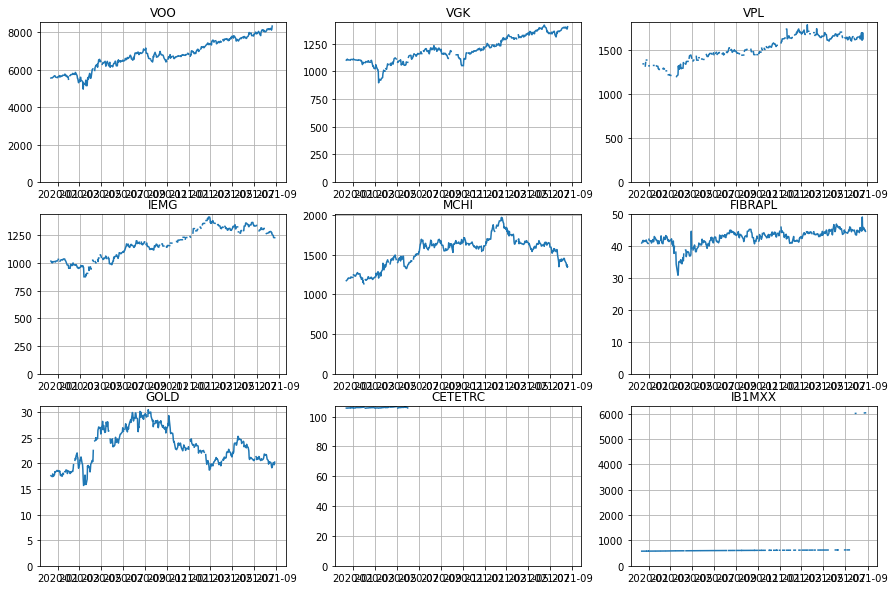

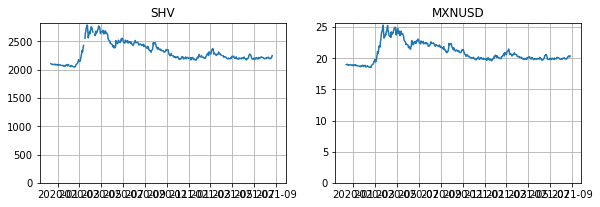

In [11]:
# Graficando los precios
# Revisar que no haya errores obvios

x = price_df.index
cols = ["P_VOO","P_VGK", "P_VPL", "P_IEMG", "P_MCHI", "P_FIBRAPL", "P_GOLD_USD", "P_CETETRC", "P_IB1MXX"]
cols2 = ["P_SHV", "FX_MXNUSD"]
ylims = [[0,None], [0,None], [0,None], [0,None],[0,None], [0,None], [0,None], [0,None], [0,None]]
ylims2 = [[0,None], [0,None]]

# Plot a figure with various axes scales
fig = plt.figure(figsize=(15,10))

# Subplot 1
for i, (col, ylim) in enumerate(zip(cols, ylims)):
    plt.subplot(331+i)
    plt.plot(x, price_df[col])
    plt.title(col.split('_')[1])
    plt.ylim(ylim)
    plt.grid(True)

# Plot a figure with various axes scales
fig = plt.figure(figsize=(15,10))

# Subplot 2
for i, (col, ylim) in enumerate(zip(cols2, ylims2)):
    plt.subplot(331+i)
    plt.plot(x, price_df[col])
    plt.title(col.split('_')[1])
    plt.ylim(ylim)
    plt.grid(True)


<a id="limpieza-valores"></a>
### Limpieza de valores [*](#indice)

In [12]:
# Limpieza de valores

# Checar los rangos de valores que se vean raros. 
# price_df.loc[ "2021-03-19":"2021-04-09", "P_EIMI"]

# Error corregido al cambiar EIMI.L por EIMI.SW
# Error en los precios de EIMI.L en esas fechas: Tienen dos ceros de mas

# Eliminando esos valores y sustituyendolos por Nan
# price_df.loc[ "2021-03-19":"2021-04-09", "P_EIMI"] = np.NaN

# Checando que haya quedado el cambio
# b = price_df.loc[ "2021-03-16":"2021-04-09"]
# b

<a id="cash-history-cash-quantity"></a>
### Pasando el Cash History al Dataframe de Cash Quantity [*](#indice)

In [13]:
# Pasando el Cash History al Dataframe de Cash Quantity 

#Creating a Date Time Range
dates = pd.date_range(start = start_date, end = end_date)

# For loop to go through every date:
for date in dates:
    # Temporary List for the for loop
    cash_list = []
    # Define final date to filter the dataframe up to that date
    cash_filtered_df = cash_df.loc[:date]
    # Get the latest cash value
    current_cash = cash_filtered_df['Cash'].iloc[-1]
    # Add the product of that sum to the output list
    cash_list.append(current_cash)
    # Add the cash quantity in the Output list as a dictionary
    new_row =  {"Cash":cash_list[0]}
    #Append the original dataframe with this new row
    cash_quantity_df = cash_quantity_df.append(pd.DataFrame(new_row, index=[date]))

cash_quantity_df.head(100)
#quantity_df.tail()

,Cash
2019-12-13,1000516
2019-12-14,1000516
2019-12-15,1000516
2019-12-16,1000516
2019-12-17,1000516
...,...
2020-03-17,545
2020-03-18,545
2020-03-19,545
2020-03-20,545


<a id="trade-history-share-quantity"></a>
### Pasando el Trade History al Dataframe de Share Quantity [*](#indice)

In [14]:
# Pasando el Trade History al Dataframe de Share Quantity 

#Creating a Date Time Range
dates = pd.date_range(start = start_date, end = end_date)
# Lists
ticker_names =  ['SHV', 'IB1MXX N', 'CETETRC', 'FIBRAPL 14', 'MCHI', 'VGK', 'VPL', 'GOLD N', 'VOO', 'IEMG']

# For loop to go through every date:
for date in dates:
    output_list = []
    # For loop to filter by every ticker:
    for ticker in ticker_names:
        # Filter the dataframe by ticker
        filtered_df = trades_df[ trades_df ['Ticker'] == ticker]
        # Define final date to sum the shares and filter the dataframe up to that date
        day_filtered_df = filtered_df.loc[:date]
        # Sum the shares from the dataframe
        total_shares = day_filtered_df['Shares'].sum()
        # Add the product of that sum to the output list
        output_list.append(total_shares)

    # Add the quantities in the Output list to their Ticker as a dictionary
    new_row =  {"Q_SHV":output_list[0],
                "Q_IB1MXX":output_list[1],
                "Q_CETETRC":output_list[2],
                "Q_FIBRAPL":output_list[3],
                "Q_MCHI":output_list[4],
                "Q_VGK":output_list[5],
                "Q_VPL":output_list[6],
                "Q_GOLD":output_list[7],
                "Q_VOO":output_list[8],
                "Q_IEMG":output_list[9]}

    #Append the original dataframe with this new row
    quantity_df = quantity_df.append(pd.DataFrame(new_row, index=[date]))

#quantity_df.head(5)
quantity_df.tail()

,Q_VOO,Q_VGK,Q_VPL,Q_IEMG,Q_MCHI,Q_FIBRAPL,Q_GOLD,Q_CETETRC,Q_IB1MXX,Q_SHV
2021-08-25,34,133,157,100,1119,19825,144,0,1212,506
2021-08-26,34,133,157,100,1119,19825,144,0,1212,506
2021-08-27,34,133,157,100,1119,19825,144,0,1212,506
2021-08-28,34,133,157,100,1119,19825,144,0,1212,506
2021-08-29,34,133,157,100,1119,19825,144,0,1212,506


<a id="balance-cetes-share-quantity"></a>
### Pasando el balance de CETES al Dataframe de Share Quantity [*](#indice)

In [15]:
# Pasando el balance de CETES al Dataframe de Share Quantity

#Creating a Date Time Range
dates = pd.date_range(start = start_date, end = end_date)

# For loop to go through every date:
for date in dates:
    # Temporary List for the for loop
    cetes_list = []
    # Define final date to filter the dataframe up to that date
    cetes_filtered_df = cetes_df.loc[:date]
    # Get the latest cash value
    current_cetes = cetes_filtered_df['Cetes_Balance'].iloc[-1]
    # Add the product of that sum to the output list
    cetes_list.append(current_cetes)
    # Add the cash quantity in the Output list as a dictionary
    new_row =  {"Cetes_Directo":cetes_list[0]}
    #Append the original dataframe with this new row
    cetes_quantity_df = cetes_quantity_df.append(pd.DataFrame(new_row, index=[date]))

cetes_quantity_df.head(100)
#quantity_df.tail()

,Cetes_Directo
2019-12-13,2672321
2019-12-14,2672321
2019-12-15,2672321
2019-12-16,2672321
2019-12-17,2672321
...,...
2020-03-17,938482
2020-03-18,938482
2020-03-19,938482
2020-03-20,938482


<a id="juntando-precio-cantidad"></a>
### Juntando los DataFrames de Precios y Cantidades [*](#indice)


In [16]:
# Juntando los Dataframes de Precios y Cantidades

df_join = pd.concat([quantity_df, cash_quantity_df, price_df, cetes_quantity_df], axis = 1 )
df_join.tail()

,Q_VOO,Q_VGK,Q_VPL,Q_IEMG,Q_MCHI,Q_FIBRAPL,Q_GOLD,Q_CETETRC,Q_IB1MXX,Q_SHV,...,P_IB1MXX,P_IEMG,P_MCHI,FX_MXNUSD,P_SHV,P_VGK,P_VOO,P_VPL,P_GOLD_MXN,Cetes_Directo
2021-08-25,34,133,157,100,1119,19825,144,0,1212,506,...,6027.92,NaN,NaN,20.21,NaN,NaN,NaN,NaN,401.09,1660061
2021-08-26,34,133,157,100,1119,19825,144,0,1212,506,...,6030.88,NaN,NaN,20.22,NaN,NaN,NaN,NaN,398.86,1660061
2021-08-27,34,133,157,100,1119,19825,144,0,1212,506,...,NaN,NaN,1392.5,20.37,2230.49,1414.0,8356.0,1651.3,412.22,1660061
2021-08-28,34,133,157,100,1119,19825,144,0,1212,506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1660061
2021-08-29,34,133,157,100,1119,19825,144,0,1212,506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1660061


<a id="interpolando"></a>
### Interpolando los Valores faltantes [*](#indice)


In [17]:
# Interpolando los Valores faltantes

df_interpol = df_join.interpolate(method ='linear', limit_direction ='both')
df_interpol.tail(10)


,Q_VOO,Q_VGK,Q_VPL,Q_IEMG,Q_MCHI,Q_FIBRAPL,Q_GOLD,Q_CETETRC,Q_IB1MXX,Q_SHV,...,P_IB1MXX,P_IEMG,P_MCHI,FX_MXNUSD,P_SHV,P_VGK,P_VOO,P_VPL,P_GOLD_MXN,Cetes_Directo
2021-08-20,34,133,157,100,1119,19825,144,0,1212,506,...,6024.67,1226.45,1347.930000,20.17,2248.500000,1402.500000,8319.980000,1629.330000,387.820000,1660061
2021-08-21,34,133,157,100,1119,19825,144,0,1212,506,...,6025.30,1226.45,1354.297143,20.24,2245.927143,1404.142857,8325.125714,1632.468571,395.443333,1660061
2021-08-22,34,133,157,100,1119,19825,144,0,1212,506,...,6025.93,1226.45,1360.664286,20.31,2243.354286,1405.785714,8330.271429,1635.607143,403.066667,1660061
2021-08-23,34,133,157,100,1119,19825,144,0,1212,506,...,6026.56,1226.45,1367.031429,20.38,2240.781429,1407.428571,8335.417143,1638.745714,410.690000,1660061
2021-08-24,34,133,157,100,1119,19825,144,0,1212,506,...,6027.29,1226.45,1373.398571,20.32,2238.208571,1409.071429,8340.562857,1641.884286,408.800000,1660061
2021-08-25,34,133,157,100,1119,19825,144,0,1212,506,...,6027.92,1226.45,1379.765714,20.21,2235.635714,1410.714286,8345.708571,1645.022857,401.090000,1660061
2021-08-26,34,133,157,100,1119,19825,144,0,1212,506,...,6030.88,1226.45,1386.132857,20.22,2233.062857,1412.357143,8350.854286,1648.161429,398.860000,1660061
2021-08-27,34,133,157,100,1119,19825,144,0,1212,506,...,6030.88,1226.45,1392.500000,20.37,2230.490000,1414.000000,8356.000000,1651.300000,412.220000,1660061
2021-08-28,34,133,157,100,1119,19825,144,0,1212,506,...,6030.88,1226.45,1392.500000,20.37,2230.490000,1414.000000,8356.000000,1651.300000,412.220000,1660061
2021-08-29,34,133,157,100,1119,19825,144,0,1212,506,...,6030.88,1226.45,1392.500000,20.37,2230.490000,1414.000000,8356.000000,1651.300000,412.220000,1660061


<a id="anadiendo-calculos"></a>
### Añadiendo las columnas de Calculos del Portafolio [*](#indice)


In [18]:
# Añadiendo las columnas de Calculos del Portafolio

# Calculando Subtotales para cada Ticker ($)
df_interpol['Sub_VOO']      = df_interpol.Q_VOO     * df_interpol.P_VOO
df_interpol['Sub_VGK']      = df_interpol.Q_VGK     * df_interpol.P_VGK
df_interpol['Sub_VPL']      = df_interpol.Q_VPL     * df_interpol.P_VPL
df_interpol['Sub_IEMG']     = df_interpol.Q_IEMG    * df_interpol.P_IEMG
df_interpol['Sub_MCHI']     = df_interpol.Q_MCHI    * df_interpol.P_MCHI

df_interpol['Sub_GOLD']     = df_interpol.Q_GOLD    * df_interpol.P_GOLD_MXN
df_interpol['Sub_FIBRAPL']  = df_interpol.Q_FIBRAPL * df_interpol.P_FIBRAPL

df_interpol['Sub_CETETRC']  = df_interpol.Q_CETETRC * df_interpol.P_CETETRC
df_interpol['Sub_IB1MXX']   = df_interpol.Q_IB1MXX  * df_interpol.P_IB1MXX
df_interpol['Sub_SHV']      = df_interpol.Q_SHV     * df_interpol.P_SHV

df_interpol.tail(5)

# Calculando Total Equity($)
df_interpol['Tot_Equity'] = df_interpol.Sub_VOO + df_interpol.Sub_VGK + df_interpol.Sub_VPL + df_interpol.Sub_IEMG+ df_interpol.Sub_MCHI 
# Calculando Total Fixed Income($)
df_interpol['Tot_FixedIncome_GBM'] = df_interpol.Sub_CETETRC + df_interpol.Sub_IB1MXX + df_interpol.Sub_SHV
# Calculando Total Fixed Income($)
df_interpol['Tot_FixedIncome'] = df_interpol.Sub_CETETRC + df_interpol.Sub_IB1MXX + df_interpol.Sub_SHV + df_interpol.Cetes_Directo
# Calculando Total Alternatives($)
df_interpol['Tot_Alternatives'] = df_interpol.Sub_GOLD + df_interpol.Sub_FIBRAPL
# Calculando Total del Portafolio($)
df_interpol['Tot_Portfolio'] = df_interpol.Cash + df_interpol.Tot_Equity + df_interpol.Tot_FixedIncome + df_interpol.Tot_Alternatives


# Calculando Total Equity(%)
df_interpol['Tot_Equity_PCT'] = df_interpol.Tot_Equity / df_interpol.Tot_Portfolio
# Calculando Total Fixed Income(%)
df_interpol['Tot_FixedIncome_PCT'] = df_interpol.Tot_FixedIncome / df_interpol.Tot_Portfolio
# Calculando Total Alternatives(%)
df_interpol['Tot_Alternatives_PCT'] = df_interpol.Tot_Alternatives / df_interpol.Tot_Portfolio


# Target Equity(%)
df_interpol['Target_Equity_PCT'] = target_equity
# Target Fixed Income(%)
df_interpol['Target_FixedIncome_PCT'] = target_fixed_income
# Target Fixed Alternatives(%)
df_interpol['Target_Alternatives_PCT'] = target_alternatives


# Calculando Equity(%) Difference
df_interpol['Difference_Equity_PCT'] = df_interpol.Tot_Equity_PCT - df_interpol.Target_Equity_PCT
# Calculando Equity(%) Difference
df_interpol['Difference_FixedIncome_PCT'] = df_interpol.Tot_FixedIncome_PCT - df_interpol.Target_FixedIncome_PCT
# Calculando Equity(%) Difference
df_interpol['Difference_Alternatives_PCT'] = df_interpol.Tot_Alternatives_PCT - df_interpol.Target_Alternatives_PCT


#Total Cuenta GBM
df_interpol['Tot_CtaGBM'] = df_interpol.Tot_Portfolio - df_interpol.Cetes_Directo


<a id="portfolio-plot"></a>
### Graficando el Portafolio Total [*](#indice)


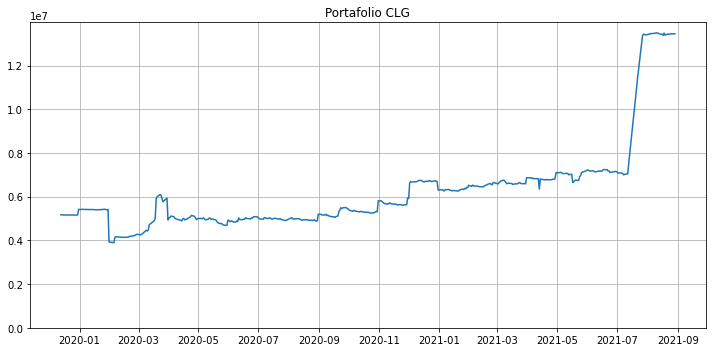

In [19]:
# Graficando el Portafolio Total

x = df_interpol.index
y = df_interpol["Tot_Portfolio"]

# plot with various axes scales
fig3 = plt.figure(figsize=(10,5))

# Valor Portafolio
plt.plot(x, y)
plt.title("Portafolio CLG")
plt.ylim([0,None])
plt.grid(True)

plt.tight_layout()
plt.show()

fig3.savefig("Outputs/Grafica_Portafolio.png", dpi=300)


## Output [*](#indice)

<a id="output-csv"></a>
### Guardando el output como CSV [*](#indice)


In [20]:
# Guardando el output como CSV
df_interpol.to_csv("Outputs/output_CLG.csv", index=True)

<a id="influx"></a>
### Exportando el dataframe a InfluxDb [*](#indice)


In [22]:
# Exportando el dataframe a InfluxDb
dbhost = '192.168.0.17'
dbport = 8086
dbuser = 'pi'
dbpasswd = 'raspberry'
dbname = 'CLG'
protocol = 'line'
measurment = "portafolio_CLG"

# In influxdb connection
client = DataFrameClient(dbhost, dbport, dbuser, dbpasswd, dbname)

# Write data to "SchoolData" measurement of "schooldb" database.
client.write_points(df_interpol, measurment, protocol=protocol)

True